In [2]:
import pandas as pd
import seaborn as sns

**Load Dataset**

In [3]:
df=pd.read_csv("churn2.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Univariate Analysis**

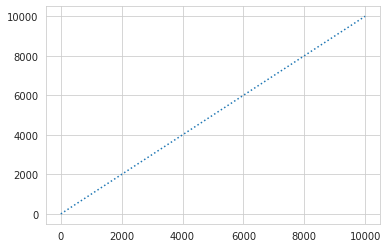

In [209]:
ypoints = np.array(df['RowNumber'])
plt.plot(ypoints, linestyle = 'dotted')
plt.show()

(array([ 226.,  585., 1561., 1781., 1834., 1673.,  798.,  576.,  311.,
         655.]),
 array([18. , 22.4, 26.8, 31.2, 35.6, 40. , 44.4, 48.8, 53.2, 57.6, 62. ]),
 <a list of 10 Patch objects>)

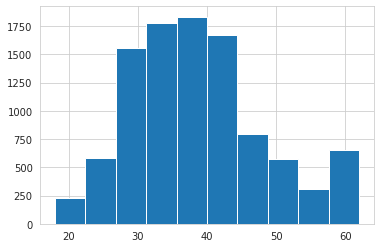

In [211]:
x=df['Age']
plt.hist(x)

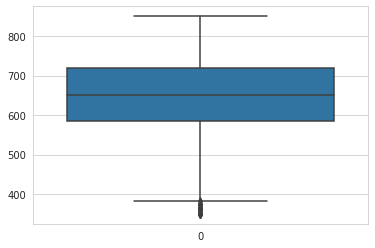

In [212]:
sns.boxplot(data=df['CreditScore'])

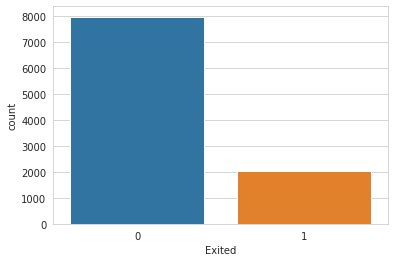

In [215]:
sns.countplot(x ='Exited', data = df)

In [ ]:
import statsmodels.api as sm

#define response variable
y = df['Exited']

#define explanatory variable
x = df[['CreditScore']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.345
Date:                Thu, 29 Sep 2022   Prob (F-statistic):            0.00674
Time:                        16:04:38   Log-Likelihood:                -5091.3
No. Observations:               10000   AIC:                         1.019e+04
Df Residuals:                    9998   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2771      0.027     10.115      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Bivariate Analysis**

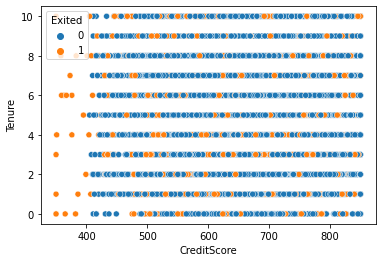

In [ ]:
#scatter plot
sns.scatterplot(x='CreditScore', y='Tenure', data=df, hue='Exited')

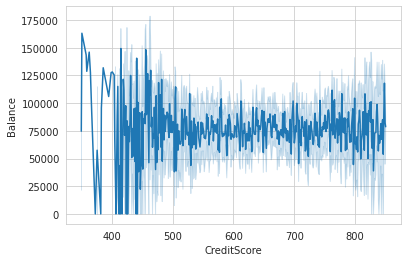

In [217]:
sns.lineplot(x="CreditScore", y="Balance", data=df)
plt.show()

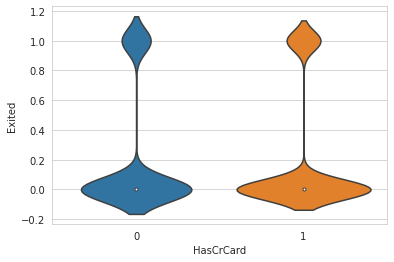

In [220]:
sns.violinplot(x ='HasCrCard', y ='Exited', data = df)

In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


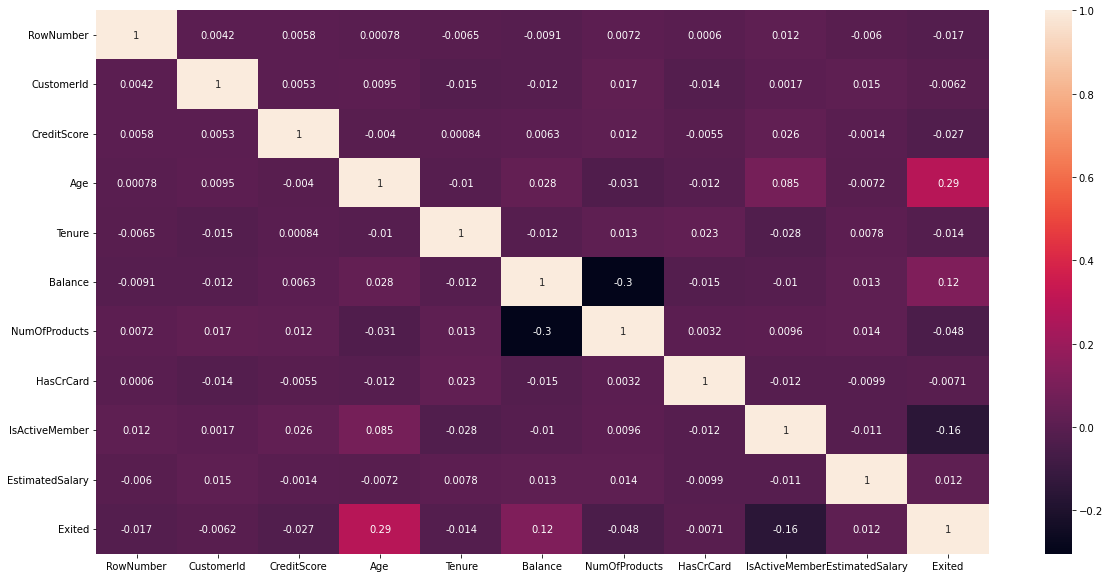

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(20, 10))
sns.heatmap(df.corr(), annot=True)


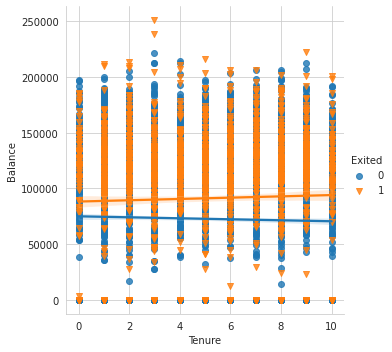

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='Tenure', y ='Balance', data = df, 
           hue ='Exited', markers =['o', 'v'])

**Multi-variate Analysis**

In [ ]:
#logistic regresion
import statsmodels.formula.api as smf
riskmodel = smf.logit(formula = 'Exited ~ CreditScore + Age	+ Tenure +	Balance	+ NumOfProducts +	HasCrCard +	IsActiveMember	+ EstimatedSalary', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.440429
         Iterations 6


In [ ]:
riskmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 29 Sep 2022   Pseudo R-squ.:                  0.1287
Time:                        15:51:22   Log-Likelihood:                -4404.3
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                1.290e-275
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.7742      0.239    -15.824      0.000      -4.242      -3.307
CreditScore        -0.0006      0.000     -2.259      0.024      -0.001   -8.26e-05
Age                 0.0729      0.003     28.738      0.000       0.068       0.078
Tenure             -0.0163      0.009     -1.764      0.078      -0.034       0.002
Balance           4.95e-06   4.57e-07     10.835      0.000    4.05e-06    5.85e-06
NumOfProducts      -0.0231      0.046     -0.500      0.617      -0.114       0.067
HasCrCard          -0.0303      0.058     -0.519      0.604      -0.145       0.084
IsActiveMember     -1.0856      0.057    -19.065      0.000      -1.197      -0.974
EstimatedSalary  5.324e-07   4.67e-07      1.141      0.254   -3.82e-07    1.45e-06
===================================================================================
"""

In [ ]:
import numpy as np
conf = riskmodel.conf_int()
conf['OR'] = riskmodel.params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))


                     2.5%     97.5%        OR
Intercept        0.014384  0.036637  0.022956
CreditScore      0.998837  0.999917  0.999377
Age              1.070258  1.080949  1.075590
Tenure           0.966223  1.001807  0.983854
Balance          1.000004  1.000006  1.000005
NumOfProducts    0.892592  1.069729  0.977155
HasCrCard        0.865234  1.087768  0.970141
IsActiveMember   0.302052  0.377585  0.337713
EstimatedSalary  1.000000  1.000001  1.000001


In [ ]:
from sklearn.metrics import confusion_matrix
predicted_values1 = riskmodel.predict()
threshold=0.5
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
cm1 = confusion_matrix(df['Exited'],predicted_class1)
print('Confusion Matrix :',cm1)

Confusion Matrix : [[7739  224]
 [1704  333]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df['Exited'],predicted_class1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7963
           1       0.60      0.16      0.26      2037

    accuracy                           0.81     10000
   macro avg       0.71      0.57      0.57     10000
weighted avg       0.77      0.81      0.76     10000



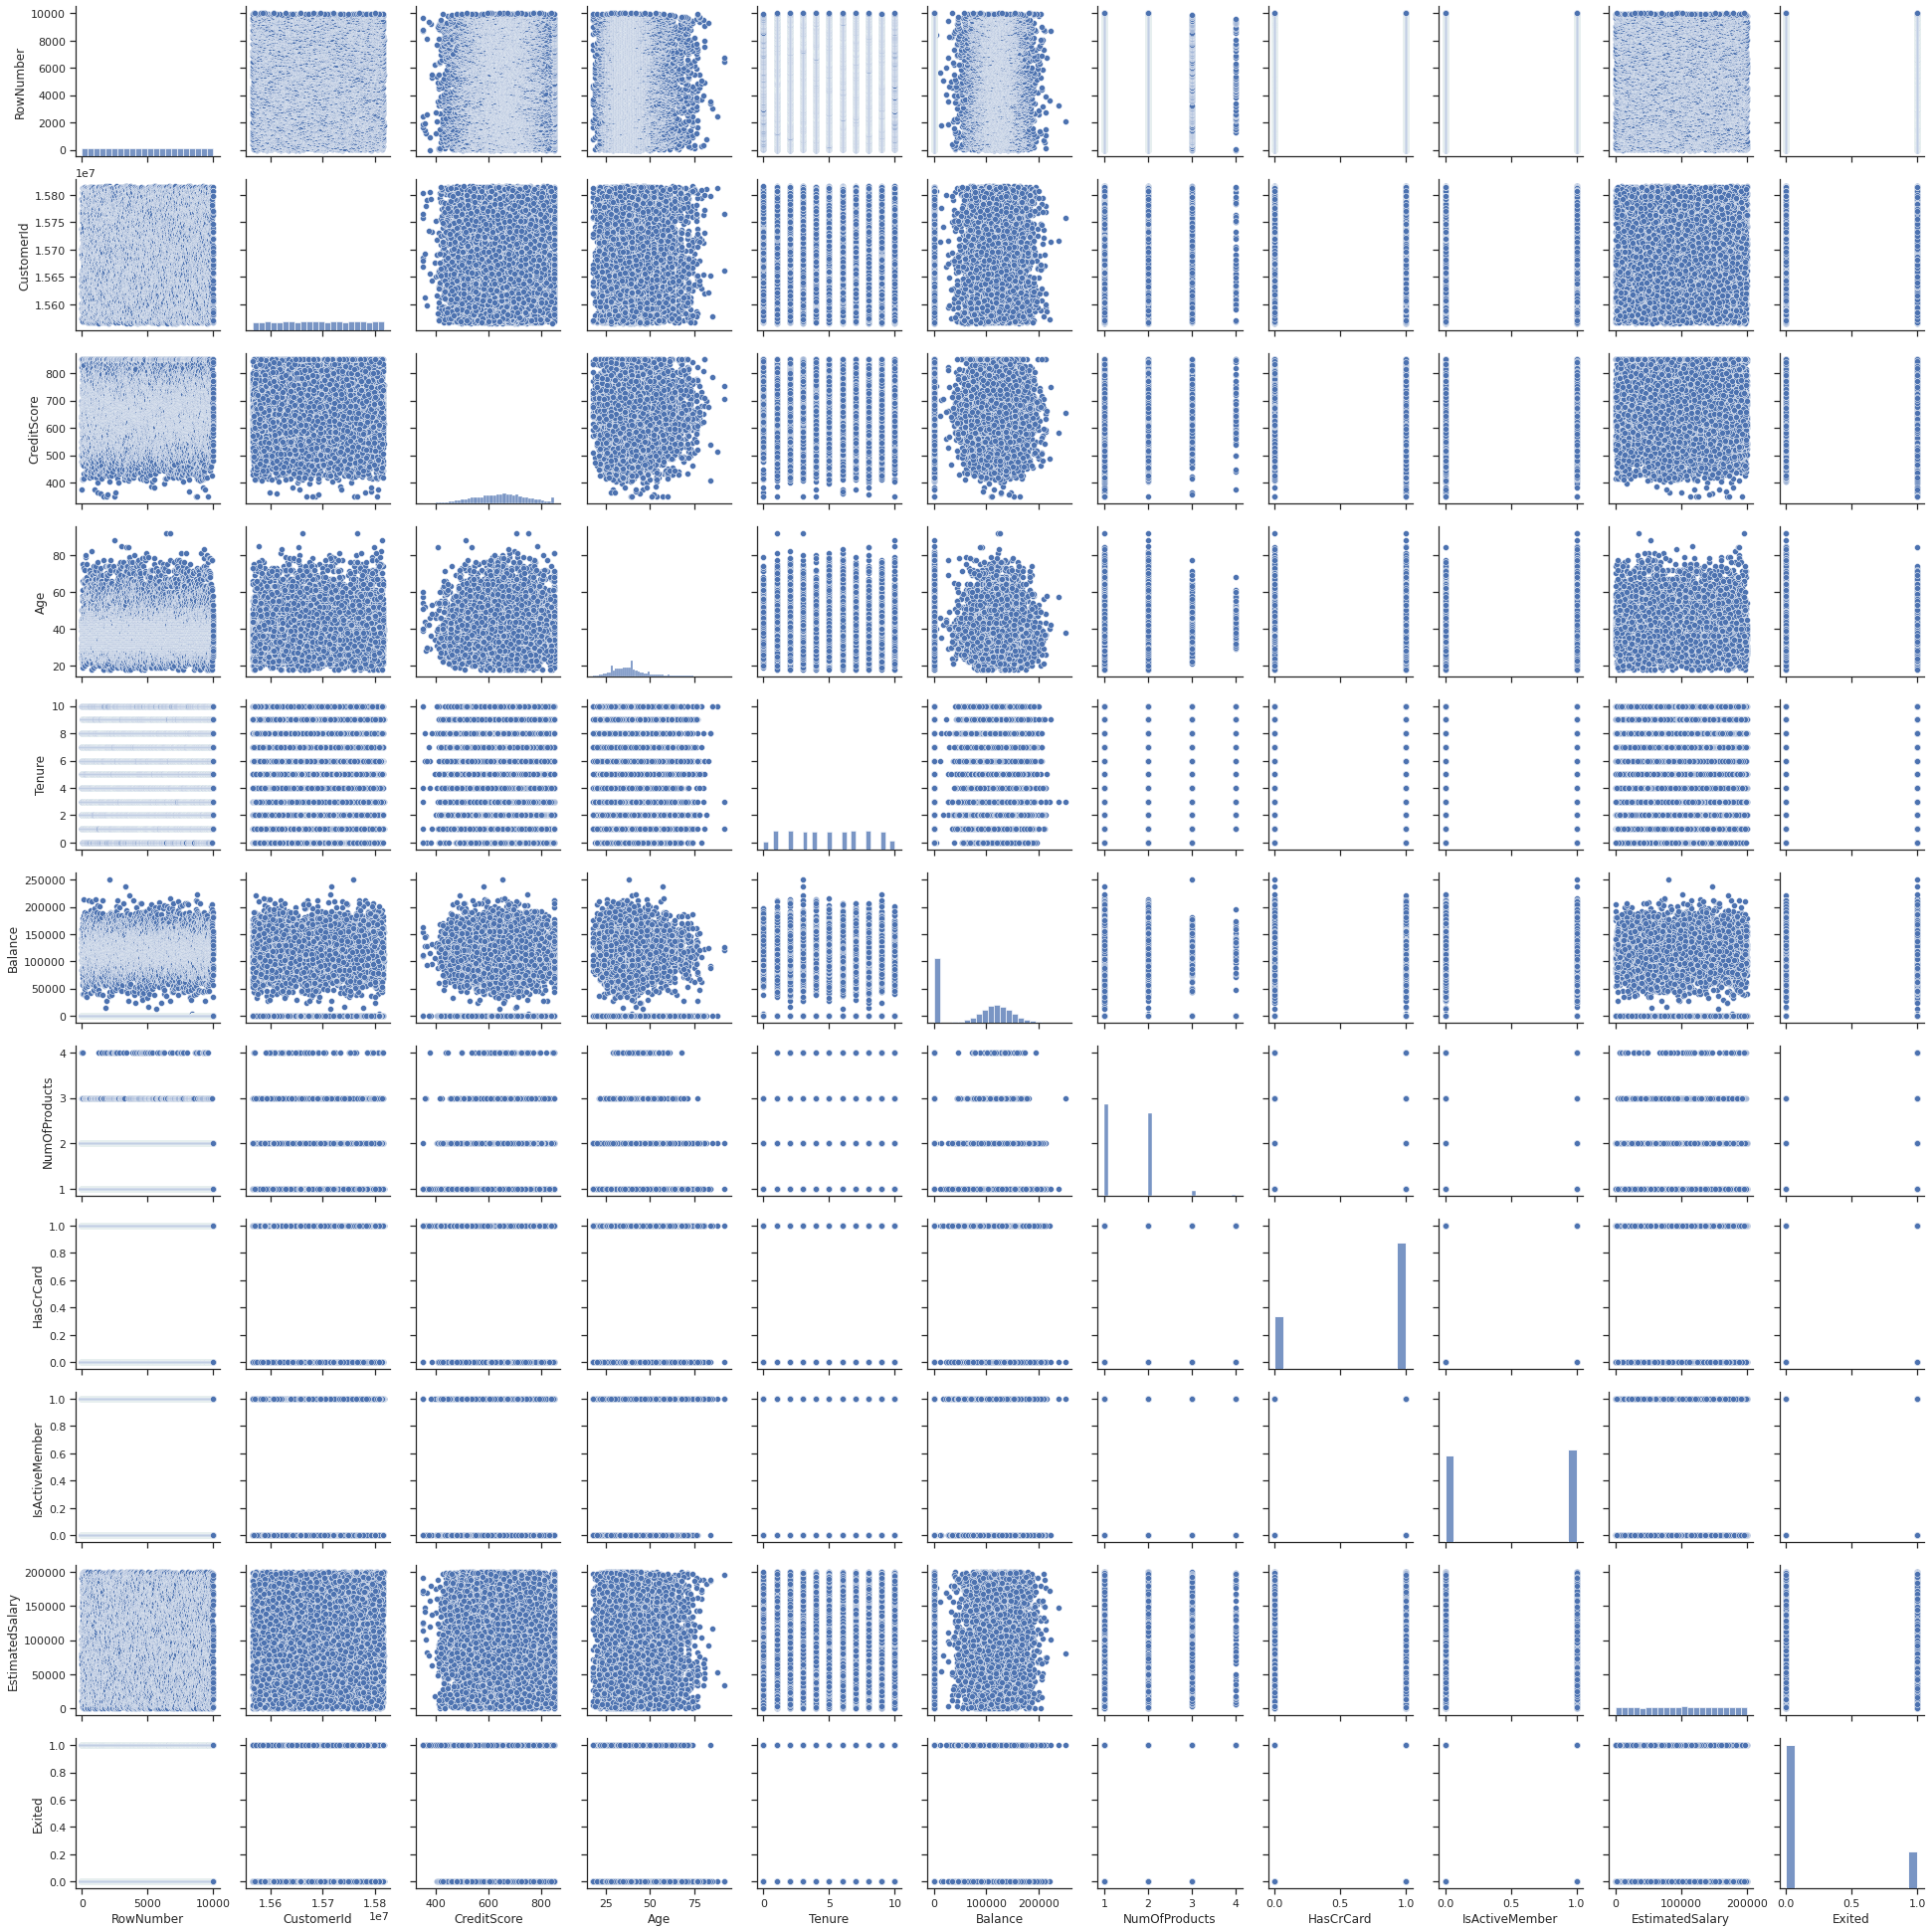

In [5]:
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
ac = accuracy_score(y_test,y_pred)
print(ac)


0.792


In [ ]:
x_pred=classifier.predict(x_train)
print("Training accuracy:",accuracy_score(y_train,x_pred))
ac = accuracy_score(y_test,y_pred)
print("Testing accuracy:",ac)

Training accuracy: 0.77925
Testing accuracy: 0.792


In [ ]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
y_prediction = LR.predict(x_test)
y_prediction

array([0.17255699, 0.10710806, 0.17666458, ..., 0.23756206, 0.07678417,
       0.27073127])

**Descriptive Statistics**

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.1+ MB


In [181]:
df.shape

(10000, 14)

In [182]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,0.545700,38.660800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,0.497932,9.746704,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,62.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [183]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [186]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [191]:
print("The mean of Credit Score:",df['CreditScore'].mean())

The mean of Credit Score: 650.5288


In [194]:
print("The mode of Tenure:",df['Tenure'].mode())

The mode of Tenure: 0    2
dtype: int64


In [195]:
print("The median of Age:",df['Age'].median())

The median of Age: 37.0


In [197]:
mth_exp_tmp = pd.crosstab(index=df["EstimatedSalary"], columns="count")
mth_exp_tmp.reset_index(inplace=True)
mth_exp_tmp[mth_exp_tmp['count'] == df.EstimatedSalary.value_counts().max()]

col_0,EstimatedSalary,count
1211,24924.92,2


In [198]:
#standard deviation for 4 columns
pd.DataFrame(df.iloc[:,0:5].std().to_frame()).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,RowNumber,CustomerId,CreditScore,Geography
0,2886.89568,71936.186123,96.653299,0.827529


**Handle Missing Values**

In [178]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Here there is no missing data

**Identify the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


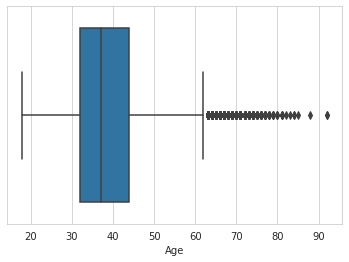

In [152]:
sns.boxplot(df['Age'])


In [154]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


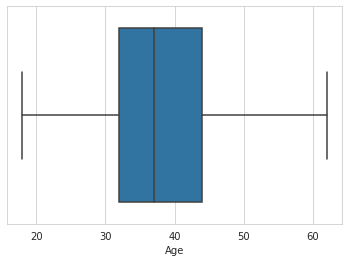

In [155]:
sns.boxplot(df['Age'])


**Check for categorical Data and perform encoding**

In [157]:
cat=[var for var in df.columns if df[var].dtype=="object"]
print("There are {} categorical variables.".format(len(cat))) #no categorical variables
print("The categorical variables are:\n\n",cat)

There are 3 categorical variables.
The categorical variables are:

 ['Surname', 'Geography', 'Gender']


In [159]:
#Analyse categorical data value
for i in cat:
  print(df[i].value_counts())

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [160]:
from sklearn.preprocessing import LabelEncoder
 
#By analysing categorical value Geography and Gender has a few values so we can use label encoding
le = LabelEncoder()
 

label = le.fit_transform(df['Gender'])
df["Gender"] = label

l1=le.fit_transform(df['Geography'])
df['Geography']=l1

In [161]:
#Now we can see datatype of geography and gender changed to int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.1+ MB


**Splitting data into dependent and independent variables**

In [162]:
#Independent variable
X = df.iloc[:, :-1].values

print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [163]:
#Dependent Variable
Y = df.iloc[:, -1].values

print(Y)

[1 0 1 ... 1 1 0]


**Scale the independent variables**

In [169]:
from sklearn import preprocessing

x=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
print(robust_df[0])

[-0.24626866  0.41666667 -0.75       -0.76148003  0.          0.
  0.          0.0117391   1.        ]


In [170]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
print(standard_df[0])

[-0.32622142  0.34261499 -1.04175968 -1.22584767 -0.91158349  0.64609167
  0.97024255  0.02188649  1.97716468]


In [171]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
print(minmax_df[0])

[0.538      0.54545455 0.2        0.         0.         1.
 1.         0.50673489 1.        ]


**Split the data into training and testing**

In [177]:
from sklearn.model_selection import train_test_split
x=df.iloc[:, :-1]
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print("Total rows in dataset:",df.shape)
print("Train Data shape: ",x_train.shape)
print("Test Data shape: ",x_test.shape)

Total rows in dataset: (10000, 14)
Train Data shape:  (8000, 13)
Test Data shape:  (2000, 13)
